<a href="https://colab.research.google.com/github/pratikjori20/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <B> Play Store App Review Data Analysis

# Introduction

Google Play Store or formerly Android Market, is a digital distribution service developed and operated by Google. It is an official apps store that provides variety content such as apps, games, books, magazines, music, movies and audiobooks. It serves an as platform to allow users with 'Google certified' Android operating system devices to donwload applications developed and published on the platform either with a paid or free of cost. With the rapidly growth of Android devices and apps, it would be interesting to perform data analysis on the data and the usesr reviews to obtain valuable insights.

The dataset that is going to be used is 'Play Store Data' and 'User Reviews' from Almabetter. It contain lots of web scraped Play Store apps and reviews data for analysing the Google Play Store. The tools that are going to be used for this EDA would be numpy, pandas, matplotlib and seaborn which I have learnt from the course.

In [3]:
# Importing necessery libraries for the dataset analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# using pandas library and 'read_csv' function to read 'Play Store Data' csv file as file already formated for us from Almabetter
playstore_data_path = '/content/drive/MyDrive/Copy of Play Store Data.csv'
df=pd.read_csv(playstore_data_path)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
# check the info from the Dataset to know basic of the column and its format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB



By diagnosing the data frame, we know that:

1. There are 13 columns of properties with 10841 rows of data.
2. Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'. 
3. Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'. 
4. Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'. 
5. Values of column 'Price' are strings representing price with symbol '$'.  


Hence, we will need to do some data cleaning.

In [7]:
#check the columns labels
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<B> Understanding, Data Wrangling and Cleaning

In [8]:
#check is there duplictes in the given dataset and delete it.
df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [10]:
# need to find out the what columns have null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [13]:
# there is special character in the coulmn 'Price' need to correct it
# there is 'Everyone' at 10472 in price column that need to replace in int
df['Price'] = df.Price.apply(lambda x: x.strip('$'))
df['Price'] = df.Price.replace('Everyone', np.NaN)

In [14]:
#convert price in numeric

df['Price'] = pd.to_numeric(df['Price'])

In [15]:
df['Reviews'].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 6002, dtype: int64

In [16]:
# there is '3.0M' in the 'Reviews' column that need to replace to get int
df['Reviews'] = df.Reviews.apply(lambda x: x.replace('3.0M','3'))
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [17]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [18]:
# convert size column in numeric
# remove the charcter from the column
df['Size'] = df.Size.apply(lambda x: x.replace(',',''))
df['Size'] = df.Size.apply(lambda x: x.strip('+'))

# there is '19M' is showing as string need to be fixed using E6 to convert in numeric
df['Size'] = df.Size.apply(lambda x: x.replace('M','E6'))

# convert '201k' is need to fix using E3
df['Size'] = df.Size.apply(lambda x: x.replace('k','E3'))

# "varies with device" need to be fix
df['Size'] = df.Size.replace('Varies with device', np.NaN)

In [19]:
df['Size'] = pd.to_numeric(df['Size'])

In [20]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [21]:
# remove the charcter from the column
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))
df['Installs'] = df.Installs.apply(lambda x: x.replace(',',''))

# string "Free" at position 10472 need to fix
df['Installs'] = df.Installs.replace('Free', np.NaN)

In [22]:
df['Installs'] = pd.to_numeric(df['Installs'])

In [23]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

0 can not be the type it has contain rating 19.0 also that is all out of the range so we need to drop that perticular row

In [24]:
# 0 need to be remove from the 'Type' column
df.loc[df['Type'] == '0'].index.values

array([10472])

In [25]:
df.drop(df.index[10472], inplace=True)

In [27]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [28]:
# now check the info of the given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


 In our case, missing data that is observed does not need too much special treatment. looking at data set we can move further, column 'Android Ver', 'Last Updated and 'Current Ver' are not much significant and irrelevent we dont need to append that values so we can drop that column. Therefore moving forword handling  of the missing data.

In [29]:
# we will ignore the some column which will not that much affect on the data sheet
df.drop(['Last Updated', 'Current Ver','Android Ver'], axis=1, inplace = True)

In [30]:
# Decsribe the given dataset
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,10840,10840,9366.000000,1.084000e+04,9.145000e+03,1.084000e+04,10839,10840.000000,10840,10840
unique,9659,33,NaN,NaN,NaN,NaN,2,NaN,6,119
top,ROBLOX,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools
freq,9,1972,NaN,NaN,NaN,NaN,10039,NaN,8714,842
mean,NaN,NaN,4.191757,4.441529e+05,2.151653e+07,1.546434e+07,NaN,1.027368,NaN,NaN
std,NaN,NaN,0.515219,2.927761e+06,2.258875e+07,8.502936e+07,NaN,15.949703,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,NaN,0.000000,NaN,NaN
25%,NaN,NaN,4.000000,3.800000e+01,4.900000e+06,1.000000e+03,NaN,0.000000,NaN,NaN
50%,NaN,NaN,4.300000,2.094000e+03,1.300000e+07,1.000000e+05,NaN,0.000000,NaN,NaN
75%,NaN,NaN,4.500000,5.477550e+04,3.000000e+07,5.000000e+06,NaN,0.000000,NaN,NaN


In [31]:
#  using pandas library and 'read_csv' function to read 'User Review' csv file as file already formated for us from Almabetter
user_review = '/content/drive/MyDrive/Copy of User Reviews.csv'
df_rev = pd.read_csv(user_review)
df_rev

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [32]:
#check the info of the given user reviews
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [33]:
# check the values of coulmn using head and tail method
df_rev.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [34]:
df_rev.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [35]:
# need to find out the what columns have null values
df_rev.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [36]:
df_rev = df_rev.dropna()

In [37]:
df_rev.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [38]:
df_rev['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

##<B> Exploring and Data Visualization

<B> No of Apps in each category

In [39]:
# find the unique and and value counts to plot the graph usinf matplotlib library
num_category = len(df['Category'].unique())
num_app_category = df['Category'].value_counts()
sorted_num_app = num_app_category.sort_values(ascending=False)

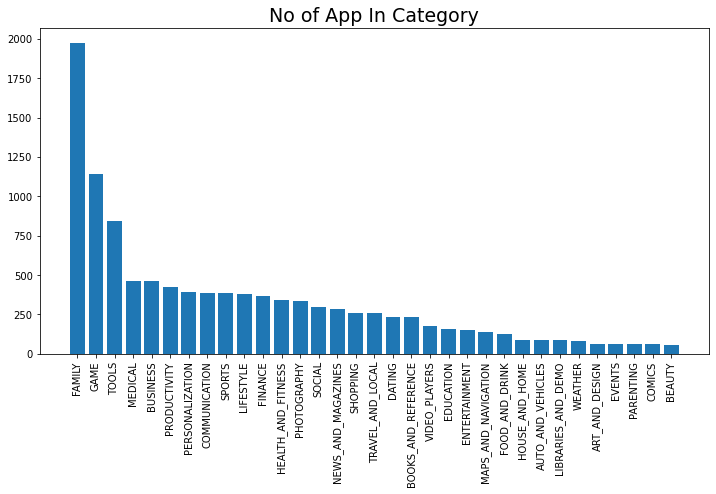

In [40]:
plt.figure(figsize = (12,6))
plt.bar(x = num_app_category.index,
        height= num_app_category.values)

plt.xticks(rotation='vertical')
plt.title('No of App In Category',size=19)

plt.show()

From this plotting we know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools

Text(0.5, 1.0, 'Rating Of App')

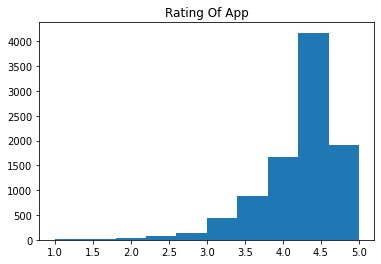

In [41]:
# histogramical representation of 'Ratings of App'
plt.hist(x= df['Rating'])
plt.title('Rating Of App')



Text(0.5, 1.0, 'Distribution Of Rating')

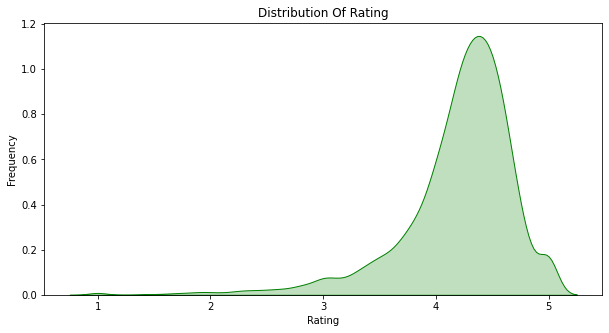

In [42]:
# Distribution of Rating
plt.figure(figsize=(10,5))
plt.xlabel('Rating')
plt.ylabel('Frequency')

sns.kdeplot(df.Rating,color='green', shade=True)
plt.title('Distribution Of Rating')

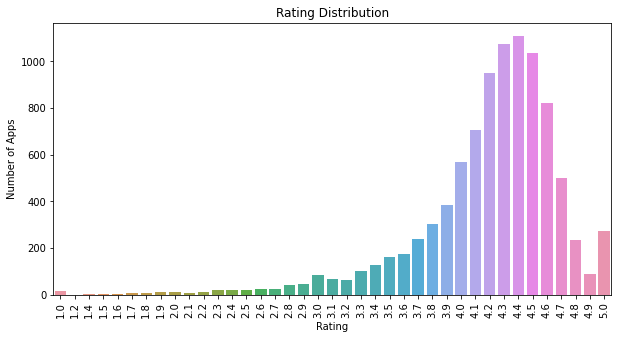

In [43]:
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=df)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

<B> Percentage of Free vs Paid App

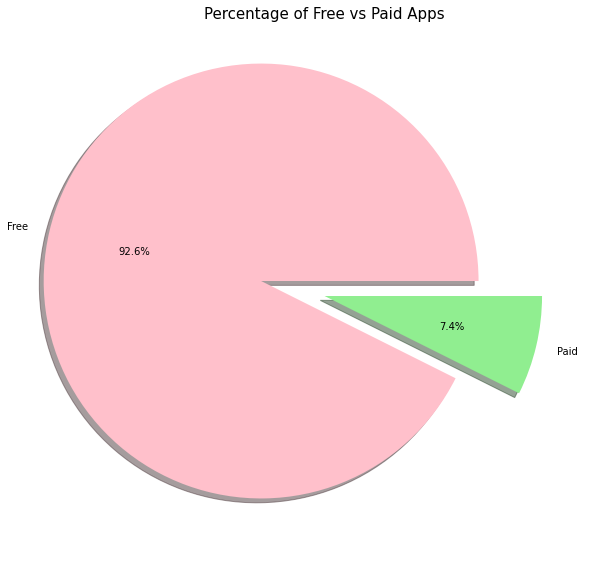

In [44]:
# plot the pie chart showing the free vs paid app
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
size = df['Type'].value_counts(sort = True)
colors = ['pink', 'lightgreen']
explode = (0.3,0)
plt.pie(size, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%',shadow=True, startangle=0)
plt.title('Percentage of Free vs Paid Apps', size= 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


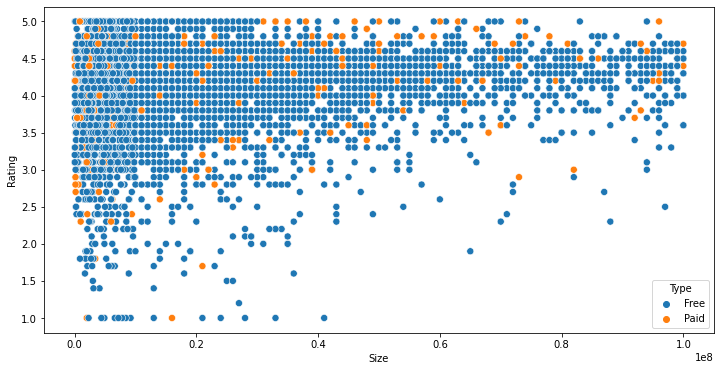

In [45]:
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
sns.scatterplot(df['Size'], df['Rating'], hue=df['Type'], s=50)

In [49]:
# correlation between different column 
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,0.083734,0.051355,-0.021903
Reviews,0.068141,1.000000,0.238215,0.643122,-0.009667
Size,0.083734,0.238215,1.000000,0.164787,-0.023006
Installs,0.051355,0.643122,0.164787,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.023006,-0.011689,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

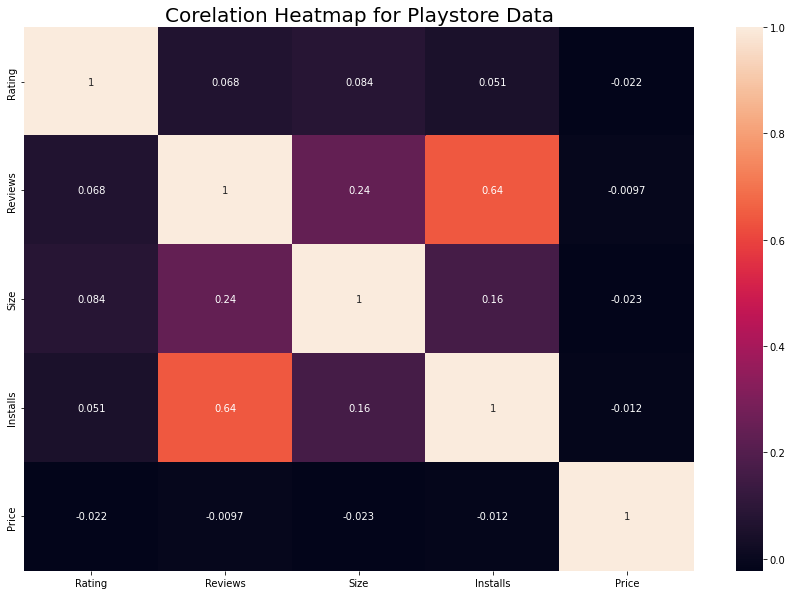

In [46]:
# using the correlation between the different column plot the heatmap
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

In [47]:
# let's check no of apps according to there category
# using groupby method
df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: App, dtype: int64

In [48]:
# difine the plot veriables
x = df['Category'].value_counts()
y = df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

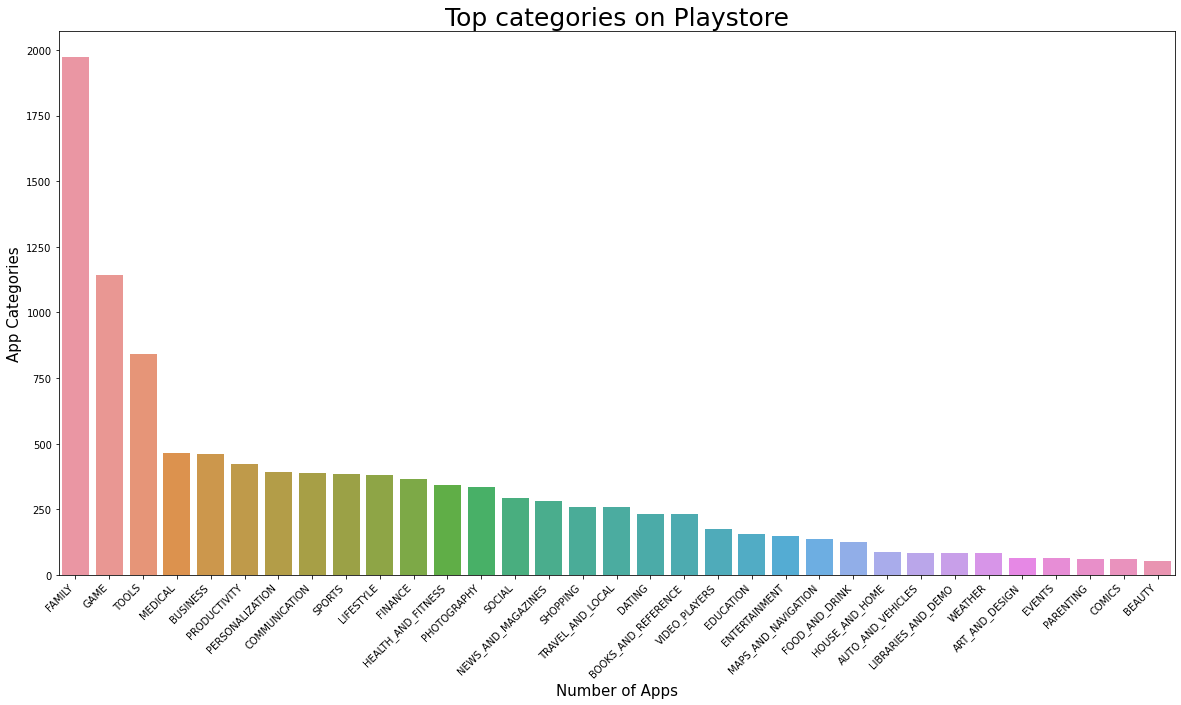

In [50]:
# Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list,)
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

<B> Question And Answering

In [51]:
# Q1. What are the Top 10 installed apps in any category?

def findtop10incategory(name):
    name = name.upper()
    top_10 = df[df['Category'] == name]
    top_10_apps = top_10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,6))
    plt.title('Top 10 Installed Apps',size = 20)  
    graph = sns.barplot(x = top_10_apps.App, y = top_10_apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

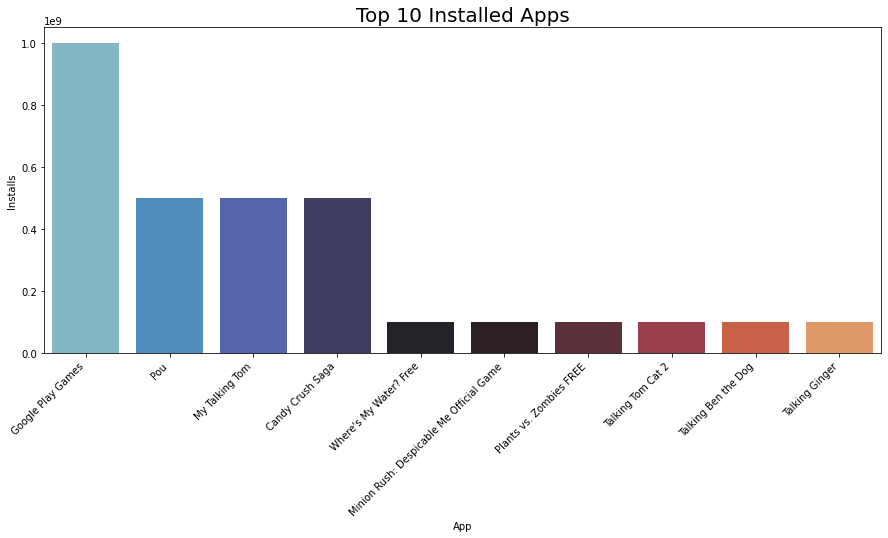

In [52]:
findtop10incategory('FAMILY')

In [53]:
# Q2. which App has higher number of reviews?

high_rev_app = df.sort_values(by='Reviews', ascending=False).head(15)
high_rev_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2544,Facebook,SOCIAL,4.1,78158306,NaN,1.000000e+09,Free,0.0,Teen,Social
3943,Facebook,SOCIAL,4.1,78128208,NaN,1.000000e+09,Free,0.0,Teen,Social
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1.000000e+09,Free,0.0,Everyone,Communication
2604,Instagram,SOCIAL,4.5,66577446,NaN,1.000000e+09,Free,0.0,Teen,Social
2611,Instagram,SOCIAL,4.5,66577313,NaN,1.000000e+09,Free,0.0,Teen,Social
2545,Instagram,SOCIAL,4.5,66577313,NaN,1.000000e+09,Free,0.0,Teen,Social
3909,Instagram,SOCIAL,4.5,66509917,NaN,1.000000e+09,Free,0.0,Teen,Social
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,1.000000e+09,Free,0.0,Everyone,Communication


In [54]:
# Q3. Which apps giving the highest earning?

paid_app = df[df['Type'] == 'Paid']
earning_app = paid_app[['App','Installs','Price']]
earning_app['Earning'] = earning_app['Installs']*earning_app['Price']
earning_app_sorted = earning_app.sort_values(by='Earning', ascending=False).head(50)
earning_app_sorted_price = earning_app_sorted.sort_values(by='Price', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Top Earning Apps')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


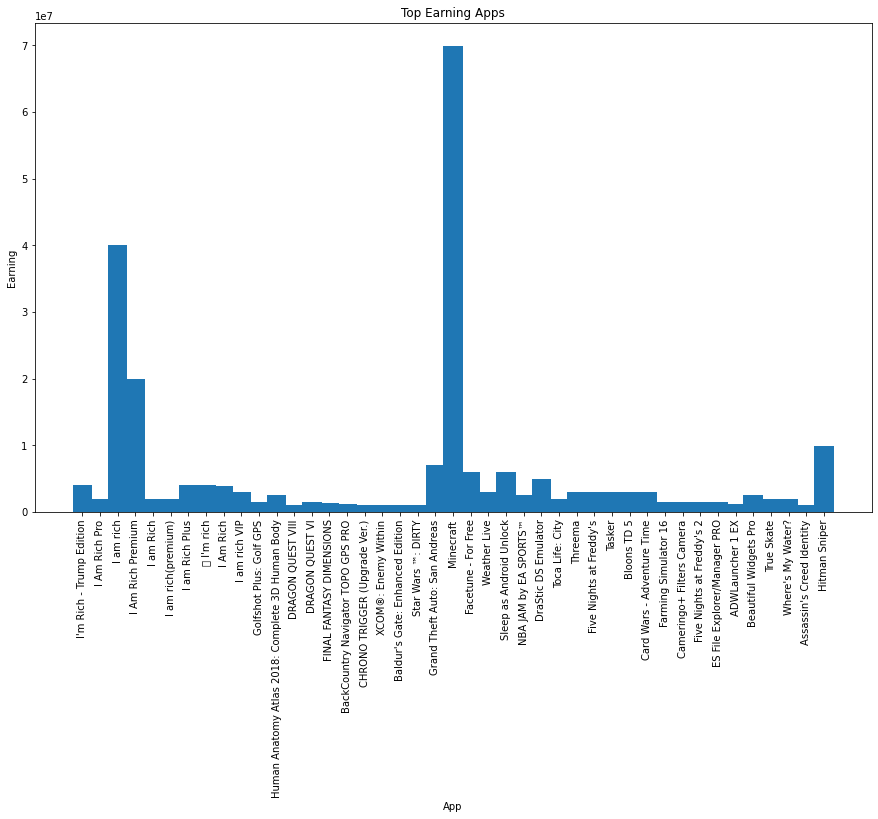

In [55]:
plt.figure(figsize =(15,9))
plt.bar(earning_app_sorted_price.App, earning_app_sorted_price.Earning, width=1.1, label= earning_app_sorted_price.Earning)
plt.xlabel('App')
plt.ylabel('Earning')
plt.xticks(rotation='vertical')
plt.title('Top Earning Apps')

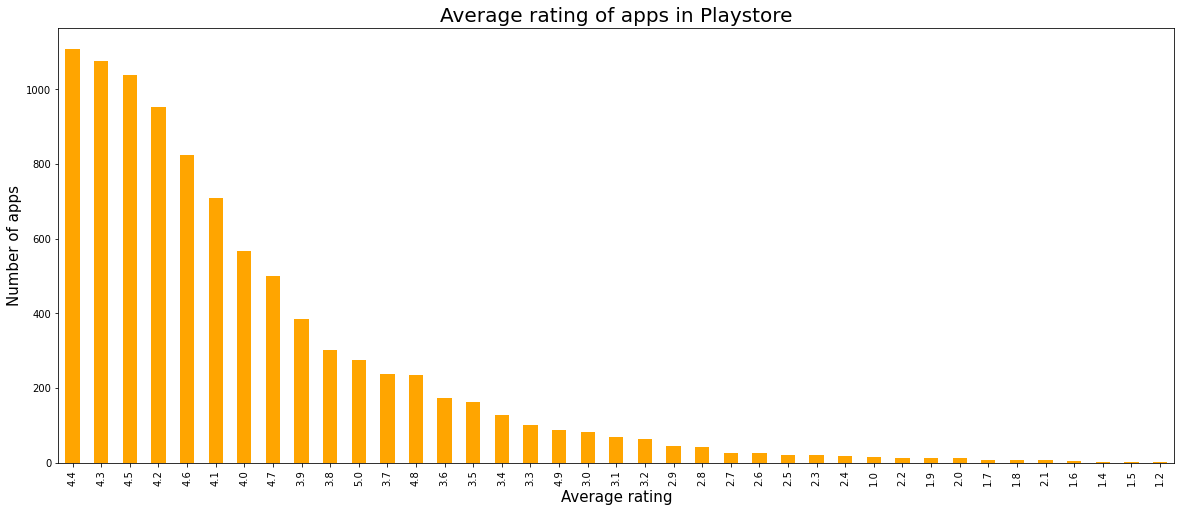

In [56]:
# Average Rating of the App in Playstore

df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'orange' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.show()

We can represent the ratings in a better way if we group the ratings between certain intervals. Here, we can group the rating as follows:

4-5: Top rated, 3-4: Above average, 2-3: Average, 1-2: Below average.


In [57]:
def Rating_app(num):
  ''''
  This function help to categories the rating from 1 to 5
  as Top_rated,Above_average,Average & below Average
  '''
  if num>=4:
    return 'Top rated'
  elif num>3 and num<4:
    return 'Above Average'
  elif num>2 and num<3:
    return 'Average'
  else:
    return 'Below Average'

In [58]:
df['Rating_group'] = df['Rating'].apply(lambda x: Rating_app(x))

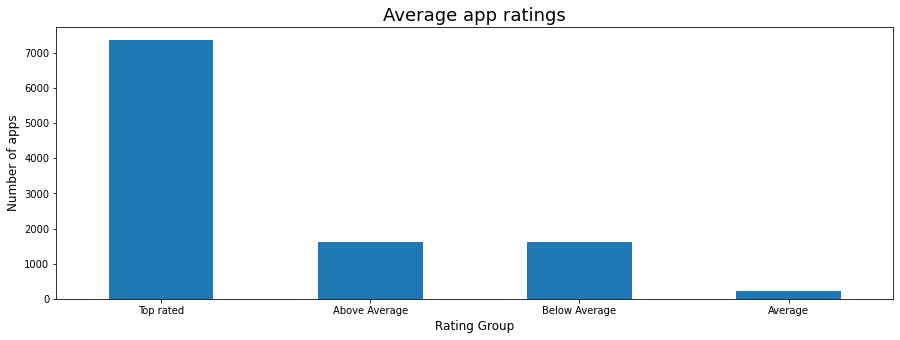

In [59]:
df['Rating_group'].value_counts().plot.bar(figsize=(15,5),)
plt.xlabel('Rating Group', fontsize = 12)
plt.ylabel('Number of apps', fontsize = 12)
plt.title('Average app ratings', fontsize = 18)
plt.xticks(rotation=0)
plt.show()

# <B> Data visualization of User Reviews

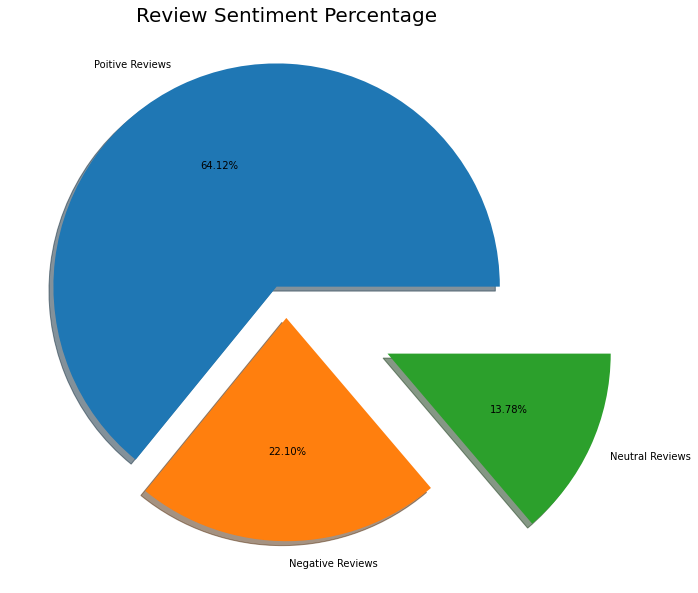

In [60]:
# we have seen the sentiment of the reviews positve, negative and neutrals, so let plot the review sentiment percentage by pie chart

data = list(df_rev['Sentiment'].value_counts())
labels = 'Poitive Reviews', 'Negative Reviews', 'Neutral Reviews'
explode = (0.1,0.05,0.5)
plt.figure(figsize=(10,15))
plt.pie(data, labels=labels, explode=explode, shadow=True, autopct='%.2f%%' )
plt.title('Review Sentiment Percentage', size=20)
plt.show()

Here we know the reviews percentages according its sentiment.
1. Positve Reviews = 64.12%
2. Negative Reviews = 22.10%
3. Neutral Reviews = 13.78%

In [61]:
# App with higher no of positive reviews

positive_rev = df_rev[df_rev['Sentiment'] == 'Positive']
positive_rev

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


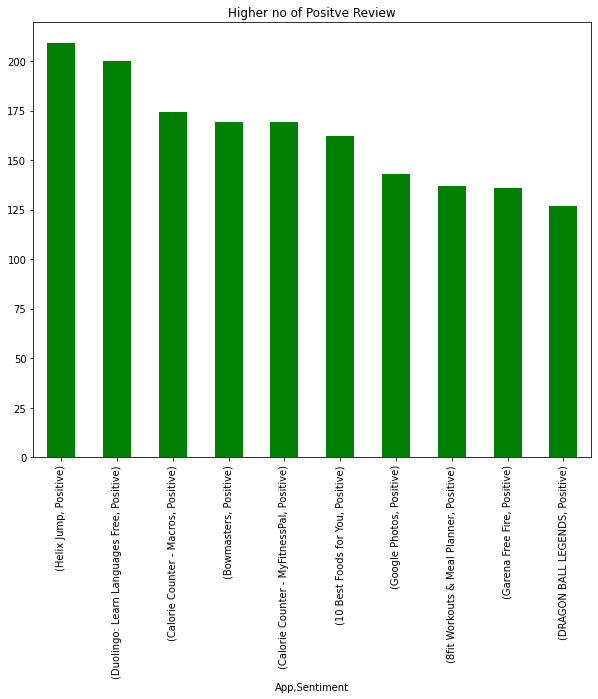

In [62]:
# plot the graph showing above code

graph = positive_rev.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.bar(figsize=(10,8), color='green')
plt.title('Higher no of Positve Review');
plt.show()

# Conclusion

The Google Play Store Apps report provides some useful insights regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

And Google Play Store User Review data provides the sentiment and it's polarity of the apps in the Play Store. AS per the graph visualizations above, get the percentage of the Review SENTIMENTS such as positive, negative, neutral.

Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store (which are mostly from FINANCE and LIFESTYLE). As a conclsuion, we learnt that the trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.

